# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './dataset/train.p'
validation_file='./dataset/valid.p'
testing_file = './dataset/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of Validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Number of Validation examples = 4410
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

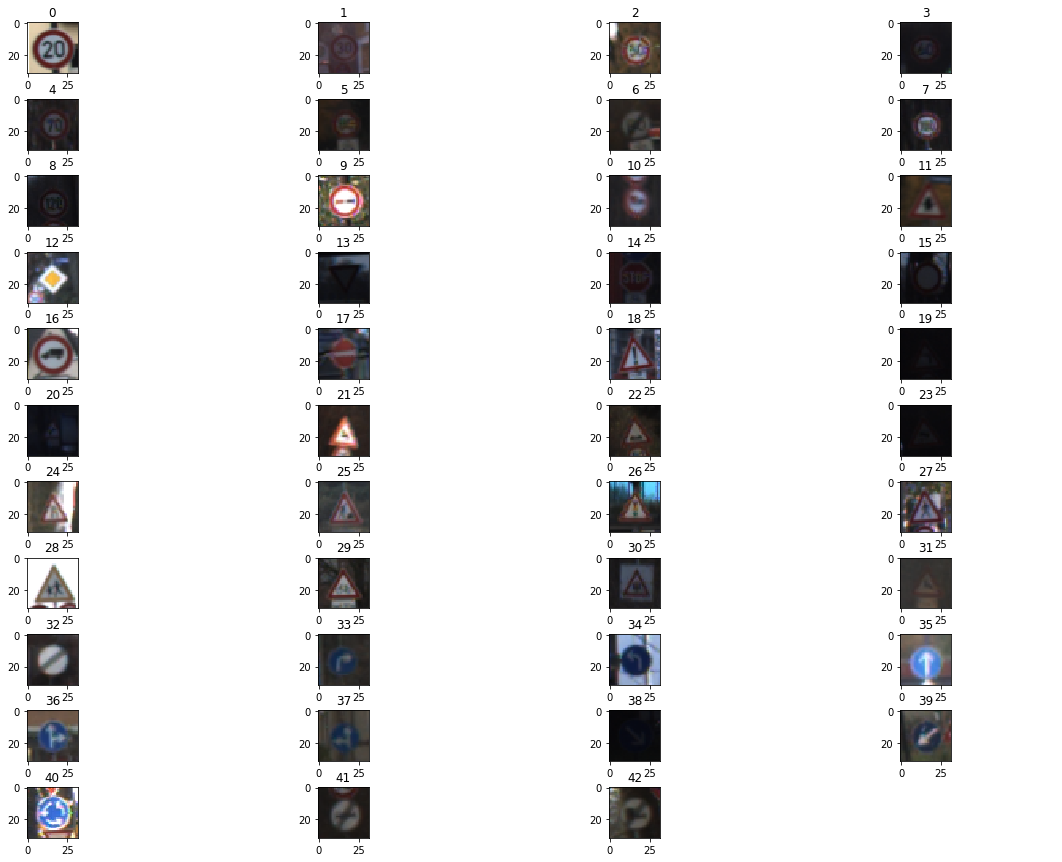

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
# Find out the indices of each unique class and plot them all together
unique_label, unique_indices = np.unique(y_train,return_index=True)
counter = 0;
fig, axs = plt.subplots(11,4, figsize=(20, 15))
plt.axis('off')
fig.subplots_adjust(hspace = .5, wspace=.2)
axs = axs.ravel()

for index in unique_indices:
    axs[counter].imshow(X_train[index])
    axs[counter].set_title(y_train[index])
    counter += 1

    


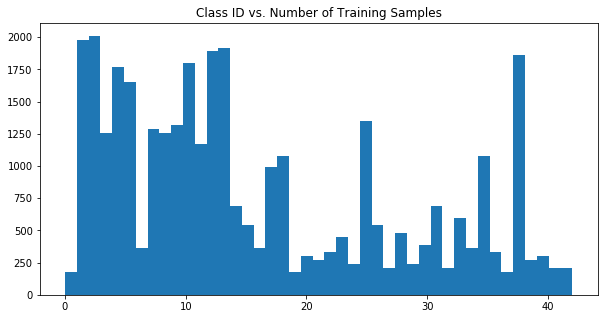

In [4]:
# Plot of Label ID vs Label Frequency
hist, bin_edges  = np.histogram(y_train, bins=n_classes)
width =  (bin_edges [1] - bin_edges [0])
center = (bin_edges [:-1] + bin_edges [1:]) / 2
plt.figure(figsize=(10, 5))
plt.title('Class ID vs. Number of Training Samples')
plt.bar(center, hist, align='center', width=width)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set

I have tried to train the neural network with different image pre-processing techniques and I notice the nomalization plays a huge important role.  Since I have a powerful GPU on my local machine (GTX980Ti), I decide to use image input with three-color channels (RGB) direclty without applying grayscale. First, I tred to apply normalziation with `(pixel - 128)/ 128` and the validation accuracy can bareley reach 85%. Next, I applied `pixel - pixel.mean()/pixel.std()`, which improves the accracuy dramatlcally. 

In addition, I have notice some of the trainning images have low brightness. Therefore I ramdomly apply brightness adjustment during the training process using `brightness_adjustment()` function on the normalized image. 

I have also tried gaussian blur to further increase the possibility of image argumentation but the result is not phenomenal. 


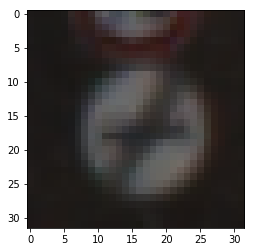

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import random
import numpy as np
import tensorflow as tf
import cv2

# Projection
#def gaussian_blur(X): 
#    adjustment = [0,1][random.randrange(2)]
#    gaussian_kernel_size = (3,3)
    
#    if adjustment ==0:
#        return X
#    elif adjustment == 1:
#        return cv2.GaussianBlur(X,gaussian_kernel_size,0)

def brightness_adjustment(X):
    # This function takes in an image and ramdomly add or minus its brightness
    adjustment = [-1,0,1][random.randrange(3)]
    x_brightness_adjusted = X + adjustment*0.15
    return x_brightness_adjusted

def process_image_randomly(X):
    #gaussian_X = gaussian_blur(X)
    processed_X = brightness_adjustment(X)
    return processed_X


# Normalization
X_train_scaled = (X_train - X_train.mean())/X_train.std()
X_valid_scaled = (X_valid - X_valid.mean())/X_valid.std()
X_test_scaled = (X_test - X_test.mean())/X_test.std()

#plt.imshow(X_train_scaled[0])
#plt.imshow(brightness_adjustment(X_train_scaled[0]))


plt.imshow(X_train[0])


### Model Architecture
Inspired by VGG16

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Hyper Parameters
EPOCHS = 20
BATCH_SIZE = 256
mu = 0
sigma = 0.1

def nn_model(x):
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # RELU
    conv1 = tf.nn.relu(conv1)
    

    # Layer 2: Convolutional. Output = 24x24x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # RELU
    conv2 = tf.nn.relu(conv2)

    # MAX Pool Input = 24x24x64. Output = 12x12x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    # Layer 3: Convolutional. Output = 11x11x128.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # RELU
    conv3 = tf.nn.relu(conv3)
    
    # MAX Pool Input = 11x11x128, Output = 5 x 5 x 128
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    # Layer 4: Convolutional. Output = 10x10x256.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(2, 2, 128, 256), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(256))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
   
    
    # RELU
    conv4 = tf.nn.relu(conv4)
    
    
    # MAX Pool Input = 4x4x256. Output = 2x2x256.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
   

    # Flatten. Input = 2x2x256. Output = 1024.
    fc0   = flatten(conv4)
  
    
    
    # Layer 3: Fully Connected. Input = 1024. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # RELU
    fc1    = tf.nn.relu(fc1)
    
    # Drop Out
    fc1_dropped = tf.nn.dropout(fc1, keep_prob=0.8)

    # Layer 4: Fully Connected. Input = 1600. Output = 800.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(256))
    fc2    = tf.matmul(fc1_dropped, fc2_W) + fc2_b
    
    # RELU
    fc2    = tf.nn.relu(fc2)
    
    # Drop Out
    fc2_dropped = tf.nn.dropout(fc2, keep_prob=0.8)
    
    # Layer 6 Fully Connected. Input = 800. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(256, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2_dropped, fc3_W) + fc3_b
    
    return logits
    

In [125]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Hyper Parameters
EPOCHS = 15
BATCH_SIZE = 256
mu = 0
sigma = 0.1

def nn_model_2(x):
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # RELU
    conv1 = tf.nn.relu(conv1)
    
    
    # Layer 2: Convolutional. Output = 11x11x128.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    
    
    # MAX Pool Input = 12x12x64, Output = 6 x 6 x 64
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(conv2)
    
    # RELU
    conv2 = tf.nn.relu(conv2)

    # Flatten. Input = 6x6x64. Output = 2304.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 2304. Output = 1152.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2304, 1152), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1152))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    
    
    # RELU
    fc1    = tf.nn.relu(fc1)
    
    # Drop Out
    fc1_dropped = tf.nn.dropout(fc1, keep_prob=0.5)

    # Layer 4: Fully Connected. Input = 1152. Output = 576.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1152, 576), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(576))
    fc2    = tf.matmul(fc1_dropped, fc2_W) + fc2_b
    
    # RELU
    fc2    = tf.nn.relu(fc2)
    
    # Drop Out
    fc2_dropped = tf.nn.dropout(fc2, keep_prob=0.5)
    
    # Layer 6 Fully Connected. Input = 800. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(576, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2_dropped, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [6]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.0009
logits = nn_model(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [7]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [9]:
# Train Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter("./tmp/log/", sess.graph)
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        #X_train_scaled, y_train = shuffle(X_train_scaled, y_train)
        for index in range(X_train_scaled.shape[0]):
            X_train_scaled[index] = process_image_randomly(X_train_scaled[index])
        X_train_scaled, y_train = shuffle(X_train_scaled, y_train)
        
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_scaled[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_scaled, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './model')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.616

EPOCH 2 ...
Validation Accuracy = 0.838

EPOCH 3 ...
Validation Accuracy = 0.894

EPOCH 4 ...
Validation Accuracy = 0.927

EPOCH 5 ...
Validation Accuracy = 0.929

EPOCH 6 ...
Validation Accuracy = 0.927

EPOCH 7 ...
Validation Accuracy = 0.928

EPOCH 8 ...
Validation Accuracy = 0.942

EPOCH 9 ...
Validation Accuracy = 0.947

EPOCH 10 ...
Validation Accuracy = 0.947

EPOCH 11 ...
Validation Accuracy = 0.948

EPOCH 12 ...
Validation Accuracy = 0.951

EPOCH 13 ...
Validation Accuracy = 0.941

EPOCH 14 ...
Validation Accuracy = 0.954

EPOCH 15 ...
Validation Accuracy = 0.966

EPOCH 16 ...
Validation Accuracy = 0.961

EPOCH 17 ...
Validation Accuracy = 0.959

EPOCH 18 ...
Validation Accuracy = 0.959

EPOCH 19 ...
Validation Accuracy = 0.966

EPOCH 20 ...
Validation Accuracy = 0.959

Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

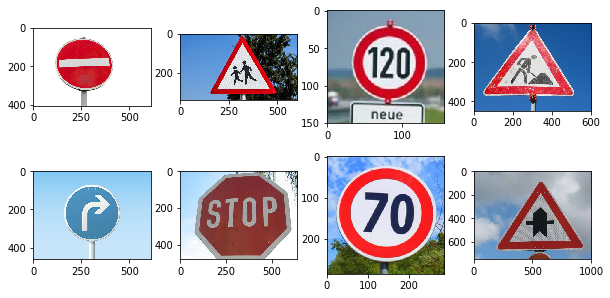

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import numpy as np
import matplotlib.image as mpimg

fig, axs = plt.subplots(2,4, figsize=(10, 5))
fig.subplots_adjust(hspace = .2, wspace=.25)
axs = axs.ravel()


def load_new_test_image():
    new_test_images = []
    for i, image in enumerate(glob.glob('./new_test_images/*.jpg')):
        new_test_images.append(mpimg.imread(image))
    new_test_images_array = np.asarray(new_test_images)
    return new_test_images_array
    
new_test_images_array = load_new_test_image()
num_test_images = new_test_images_array.shape[0]

# Visualize Images
for index in range(0,num_test_images):
    axs[index].imshow(new_test_images_array[index])


Next, we want to perform the same preprocess step from earlier 

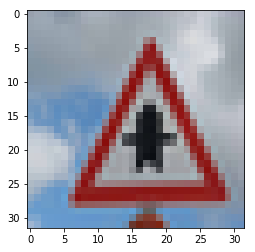

In [98]:
from PIL import Image

# Scale Image to Appropriate Size 32x32x3
test_images_reshaped = np.empty(shape=(num_test_images,32,32,3),dtype =np.uint16)
for index in range(0,num_test_images):
    im = Image.fromarray(new_test_images_array[index])
    im_reshaped = im.resize((32,32),Image.LANCZOS)
    test_images_reshaped[index] = np.asarray(im_reshaped)

# Generate test images label
y_new_test = np.array([17,28,8,25,33,14,4,11])

# Generate test images feature matrix
x_new_test = test_images_reshaped

# Normalization
x_new_test_normalized = (x_new_test - x_new_test.mean())/x_new_test.std()

plt.imshow(x_new_test[7])

### Predict the Sign Type for Each Image and Accuracy

In [26]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    server.restore(sess, "./model")
    test_accuracy = evaluate(x_new_test_normalized, y_new_test)
    print('The test accuracy is ',test_accuracy*100,'%')


INFO:tensorflow:Restoring parameters from ./model
The test accuracy is  100.0 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [30]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

output_softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(output_softmax, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    server.restore(sess, "./model")
    output_softmax = sess.run(output_softmax, feed_dict={x: x_new_test_normalized})
    output_top_k = sess.run(top_k, feed_dict={x: x_new_test_normalized})
    
print(output_top_k)

INFO:tensorflow:Restoring parameters from ./model
TopKV2(values=array([[1.0000000e+00, 4.8898380e-13, 1.7122764e-13, 3.3796157e-15,
        7.1026762e-16],
       [1.0000000e+00, 9.6120201e-10, 1.8667690e-10, 1.9162265e-12,
        5.4501361e-15],
       [1.0000000e+00, 3.2976207e-26, 4.5829713e-28, 2.3392428e-29,
        3.8761155e-34],
       [1.0000000e+00, 1.1475540e-18, 3.5096518e-21, 3.6173967e-31,
        2.2732798e-31],
       [1.0000000e+00, 4.9249693e-12, 5.0027333e-13, 1.6171722e-14,
        1.6713515e-17],
       [9.9999917e-01, 3.7298764e-07, 2.3324060e-07, 2.2106924e-07,
        4.2657401e-08],
       [1.0000000e+00, 8.2248151e-13, 3.9398226e-15, 6.2529559e-21,
        2.2937094e-21],
       [1.0000000e+00, 1.2798993e-28, 2.0435669e-34, 1.6466654e-38,
        1.4181395e-38]], dtype=float32), indices=array([[17, 42,  6, 14, 32],
       [28, 29, 24, 20, 23],
       [ 8,  7,  0,  5,  4],
       [25, 22, 24, 29, 30],
       [33, 40, 39, 35, 37],
       [14,  1, 29,  0,  5],
 

In [66]:
import pandas as pd


probability_table = output_top_k[0]
num_of_test_classes, top_k_prediuction = output_top_k[1].shape
y_new_test_2d = np.array([y_new_test])
comparison_label_matrix = np.concatenate((y_new_test_2d.T, output_top_k[1]), axis=1)
row,col = comparison_label_matrix.shape

label_rank_data = pd.DataFrame({'Ground Truth':comparison_label_matrix[:,0],'Top Prediction Label':comparison_label_matrix[:,1],'2nd Prediction Label':comparison_label_matrix[:,2],'3rd Prediction Label ':comparison_label_matrix[:,3],'4th Prediction Label':comparison_label_matrix[:,4],'5th Prediction Label':comparison_label_matrix[:,5]})
probability_rank_table = pd.DataFrame({'Top Prediction Probability':probability_table[:,0],'2nd Prediction Probability':probability_table[:,1],'3rd Prediction Probability':probability_table[:,2],'4th Prediction Probability':probability_table[:,3],'5th Prediction Probability':probability_table[:,4]})

print(label_rank_data)
print(probability_rank_table)

   Ground Truth  Top Prediction Label  2nd Prediction Label  \
0            17                    17                    42   
1            28                    28                    29   
2             8                     8                     7   
3            25                    25                    22   
4            33                    33                    40   
5            14                    14                     1   
6             4                     4                     1   
7            11                    11                    30   

   3rd Prediction Label   4th Prediction Label  5th Prediction Label  
0                      6                    14                    32  
1                     24                    20                    23  
2                      0                     5                     4  
3                     24                    29                    30  
4                     39                    35                    37  
5     

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.